<a href="https://colab.research.google.com/github/mon-ika349/projects/blob/main/zomatoproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

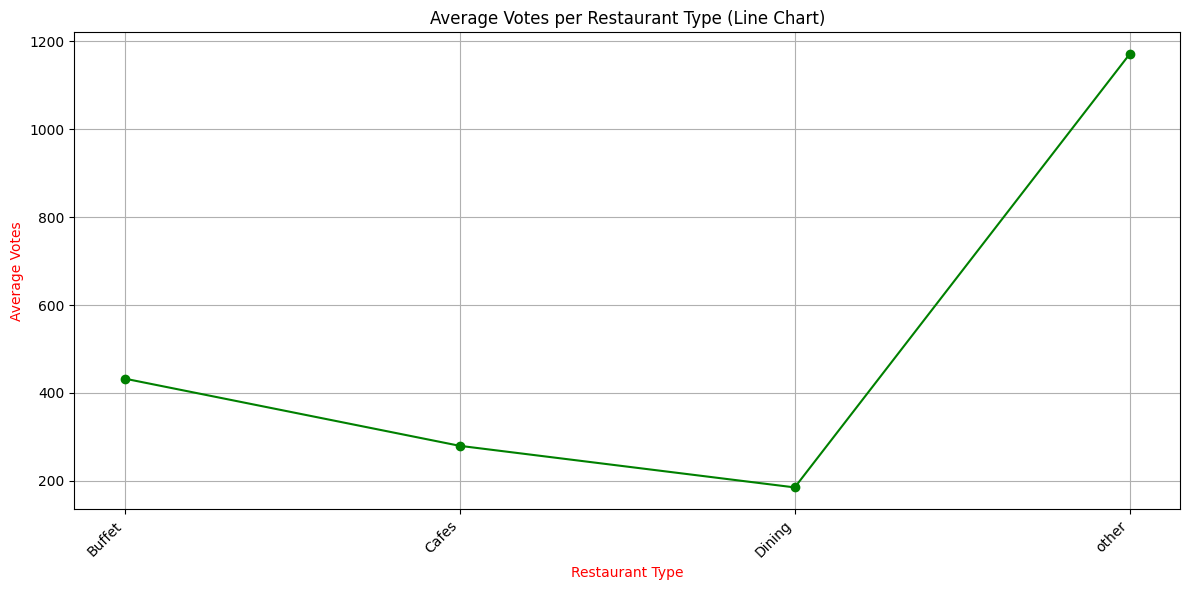

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped is your DataFrame with 'listed_in(type)' and 'votes'
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_grouped['listed_in(type)'], df_grouped['votes'], marker='o', color='green')
plt.xlabel('Restaurant Type',c='red')
plt.ylabel('Average Votes',c='red')
plt.title('Average Votes per Restaurant Type (Line Chart)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)  # Add a grid for better visualization
plt.tight_layout()
plt.show()

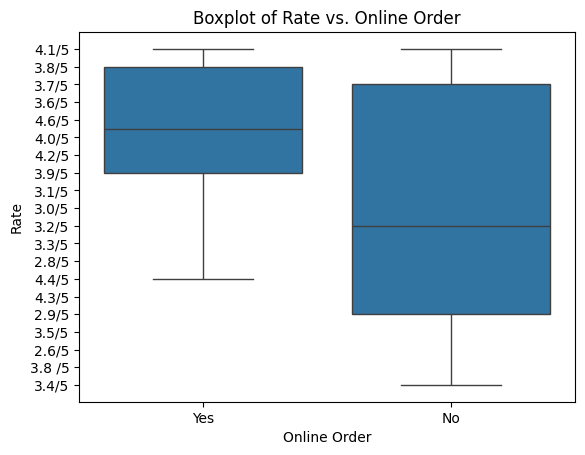

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Install seaborn if you haven't already:
# !pip install seaborn

# Create the boxplot
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Boxplot of Rate vs. Online Order')
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()

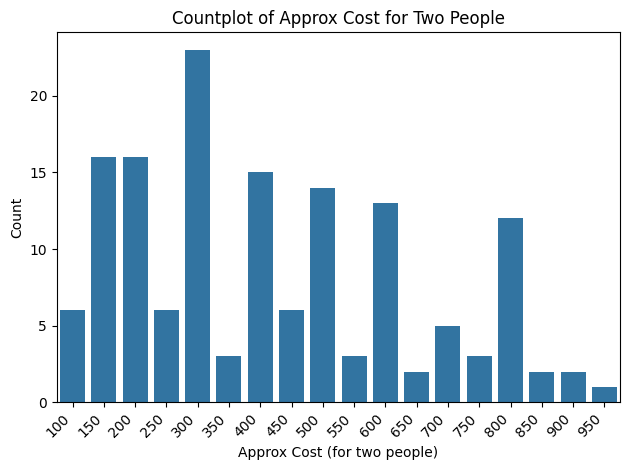

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Install seaborn if you haven't already:
# !pip install seaborn

# Create the countplot
sns.countplot(x='approx_cost(for two people)', data=df)
plt.title('Countplot of Approx Cost for Two People')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

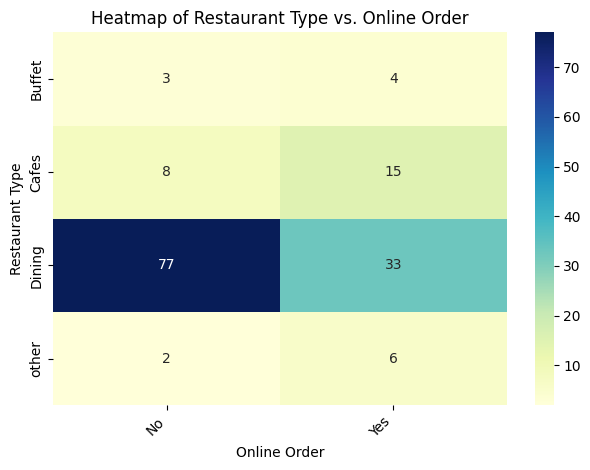

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Restaurant Type vs. Online Order")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Task
plot graph between type of restaurant and votes

Here is all the data you need:
"Zomato-data-.csv"

## Data loading

### Subtask:
Load the Zomato dataset.


**Reasoning**:
I need to load the dataset and display the first few rows along with its shape to verify the loading.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Zomato-data-.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Zomato-data-.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


(148, 7)


## Data exploration

### Subtask:
Explore the data to identify the relevant columns for plotting the relationship between restaurant type and votes.


**Reasoning**:
Examine the DataFrame columns to identify the restaurant type and votes columns, check for missing values and data types.



In [ ]:
# Identify the restaurant type and votes columns
restaurant_type_col = 'listed_in(type)'
votes_col = 'votes'

# Check for missing values
missing_restaurant_type = df[restaurant_type_col].isnull().sum()
missing_votes = df[votes_col].isnull().sum()

# Check data types
restaurant_type_dtype = df[restaurant_type_col].dtype
votes_dtype = df[votes_col].dtype

# Summarize findings
print(f"Restaurant Type Column: {restaurant_type_col}")
print(f"Number of missing values: {missing_restaurant_type}")
print(f"Data type: {restaurant_type_dtype}")
print(f"\nVotes Column: {votes_col}")
print(f"Number of missing values: {missing_votes}")
print(f"Data type: {votes_dtype}")

Restaurant Type Column: listed_in(type)
Number of missing values: 0
Data type: object

Votes Column: votes
Number of missing values: 0
Data type: int64


## Data wrangling

### Subtask:
Prepare the data for visualization by grouping and aggregating.


**Reasoning**:
Group the DataFrame by 'listed_in(type)', calculate the mean of 'votes' for each group, reset the index, and select only the relevant columns.



In [ ]:
# Group by 'listed_in(type)' and calculate the mean of 'votes'
df_grouped = df.groupby('listed_in(type)')['votes'].mean().reset_index()

display(df_grouped)

,listed_in(type),votes
0,Buffet,432.571429
1,Cafes,279.739130
2,Dining,185.118182
3,other,1170.875000


## Data visualization

### Subtask:
Visualize the relationship between restaurant type and average votes using an appropriate chart.


**Reasoning**:
Create the bar chart visualizing the relationship between restaurant type and average votes using the prepared `df_grouped` DataFrame.



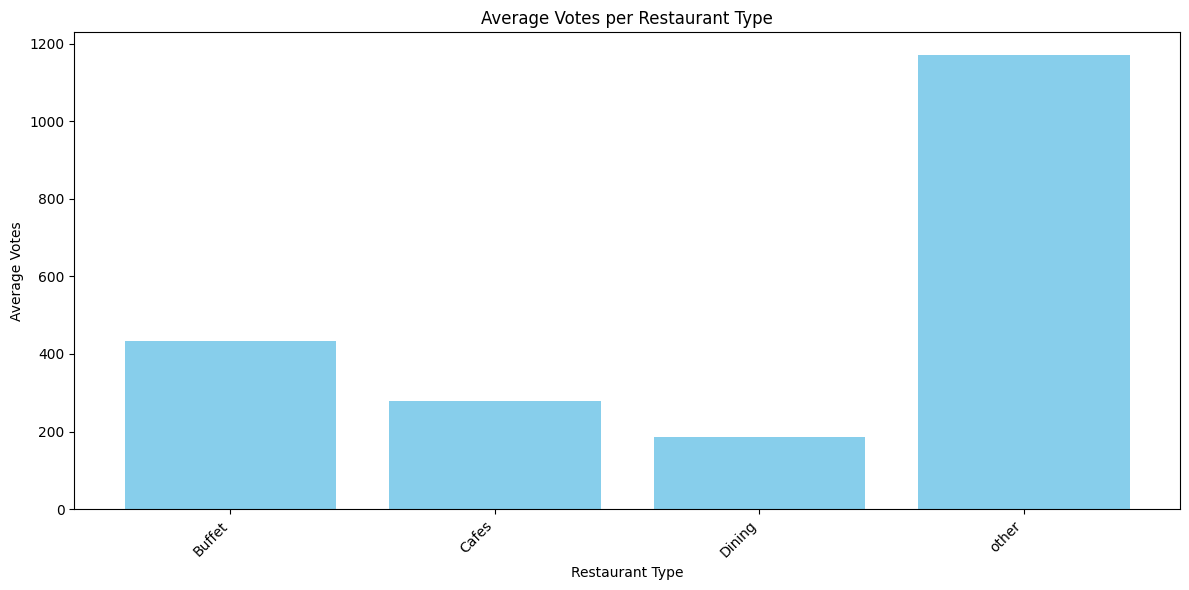

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(df_grouped['listed_in(type)'], df_grouped['votes'], color='skyblue')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.title('Average Votes per Restaurant Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Summary:

### Q&A
No questions were posed in the provided data analysis task.

### Data Analysis Key Findings

* **Data Loading:** The Zomato dataset ("Zomato-data-.csv") was successfully loaded into a pandas DataFrame with 148 rows and 7 columns. No errors were encountered.
* **Data Exploration:**  The 'listed_in(type)' column (restaurant type) and 'votes' column were identified as relevant.  Crucially, *no missing values* were found in either of these columns.  'votes' is numeric (int64), and 'listed_in(type)' is categorical (object/string).
* **Data Wrangling:** The data was grouped by 'listed_in(type)' and the mean of 'votes' was calculated for each restaurant type, creating a new DataFrame (`df_grouped`) for visualization.
* **Data Visualization:** A bar chart was generated showing the average votes per restaurant type. The chart effectively communicates the relationship between these two variables.  X-axis labels were rotated for readability.


### Insights or Next Steps

* **Investigate Restaurant Types with High/Low Average Votes:**  Further analysis could explore *why* certain restaurant types have significantly higher or lower average votes.  This could involve examining other variables in the dataset (e.g., cost, ratings).
* **Explore other visualization techniques:** Consider box plots or violin plots to visualize the distribution of votes within each restaurant type, which would complement the bar chart of average votes and reveal more granular information.
